In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
sns.set()
from results import load

#constants
experiment_phase = {'p0':60000, 'p1':60000, 'p2':180000}
experiment_phase_labels = [*experiment_phase]

# Reading the results

In [2]:
#config
experiment_name = "full"
providers = ["aws","ibm","gcf","azure",] 
num_repetitions = 1
configs = [ "0,0,1","0,0,0.5","0,0,2"]

all = load(experiment_name, providers,configs,num_repetitions,True)
all.columns

reading 0,0,1 aws 1
reading 0,0,1 ibm 1
reading 0,0,1 gcf 1
reading 0,0,1 azure 1
reading 0,0,0.5 aws 1
reading 0,0,0.5 ibm 1
reading 0,0,0.5 gcf 1
reading 0,0,0.5 azure 1
reading 0,0,2 aws 1
reading 0,0,2 ibm 1
reading 0,0,2 gcf 1


b'Skipping line 4058: expected 15 fields, saw 20\n'


reading 0,0,2 azure 1


Index(['RId', 'WL', 'CId', 'CStart', 'ELat', 'RSuccess', 'Phase', 'RStart',
       'EStart', 'EEnd', 'REnd', 'CPlat', 'COs', 'RInput', 'Provider', 'RLat',
       'RResult', 'run', 'sourceFile', 'RCode', 'HId'],
      dtype='object')

In [4]:
all.to_csv("results/full.csv")

In [180]:

def plotLatencyBand(ax,data,group,lat,label="Latency",interval=1000):
    g = group+"_"+lat+"_"+str(interval)
    data[g] = round(data[group]/interval)
    lats = data.groupby([g])[lat].agg([np.mean,np.max,np.min]).reset_index()
    sns.lineplot(x=g, y='mean', data=lats,ax=ax,label=label)
    ax.fill_between(x=g,y1="amax",y2="amin",data=lats,alpha=0.5)

    
def plotWorkload(ax,data,time,label="Workload",interval=1000):
    g = time+"_WL_"+str(interval)
    data[g] = round(data[time]/interval)
    lats = data.groupby([g])['RId'].count().reset_index(name="workload")
    sns.lineplot(x=g, y='workload', data=lats, color="gray",label=label,ax=ax2)    



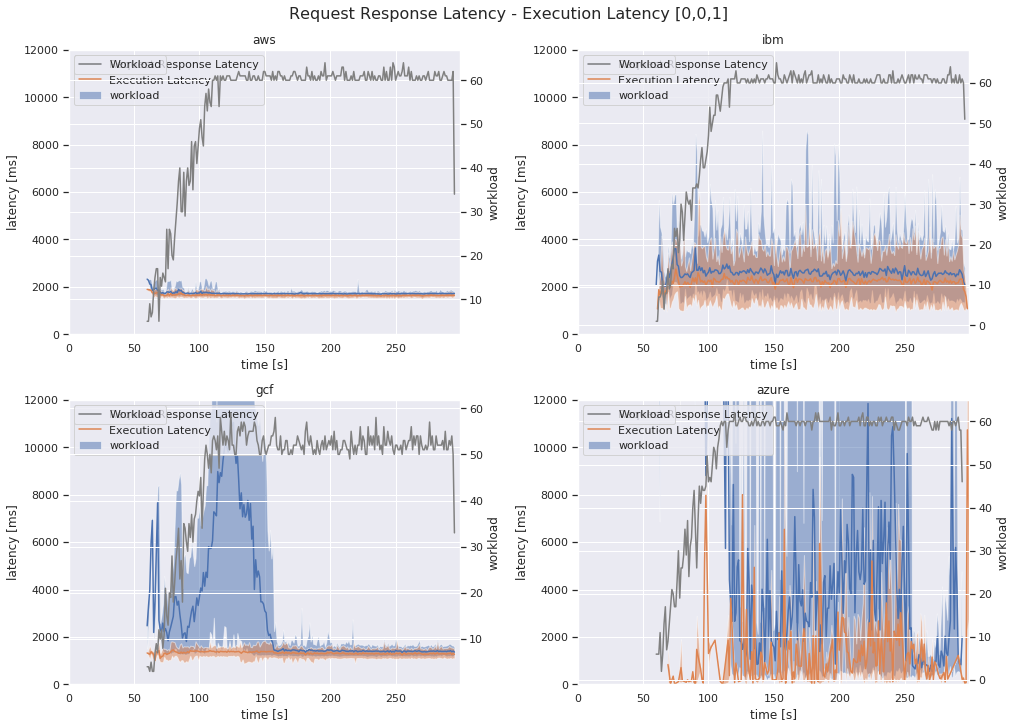

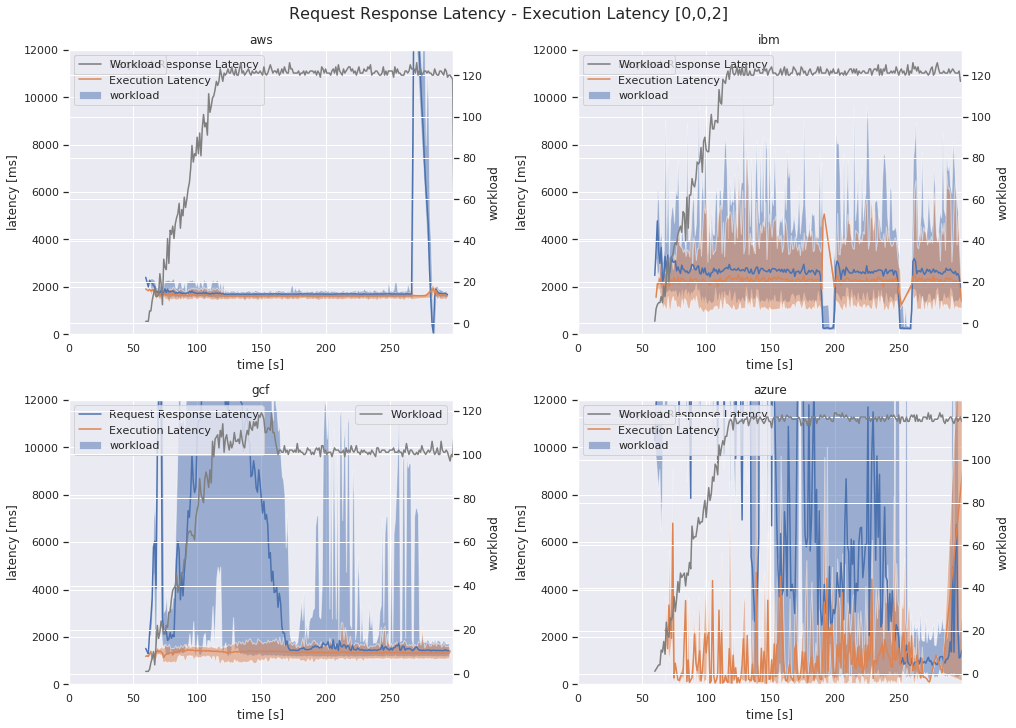

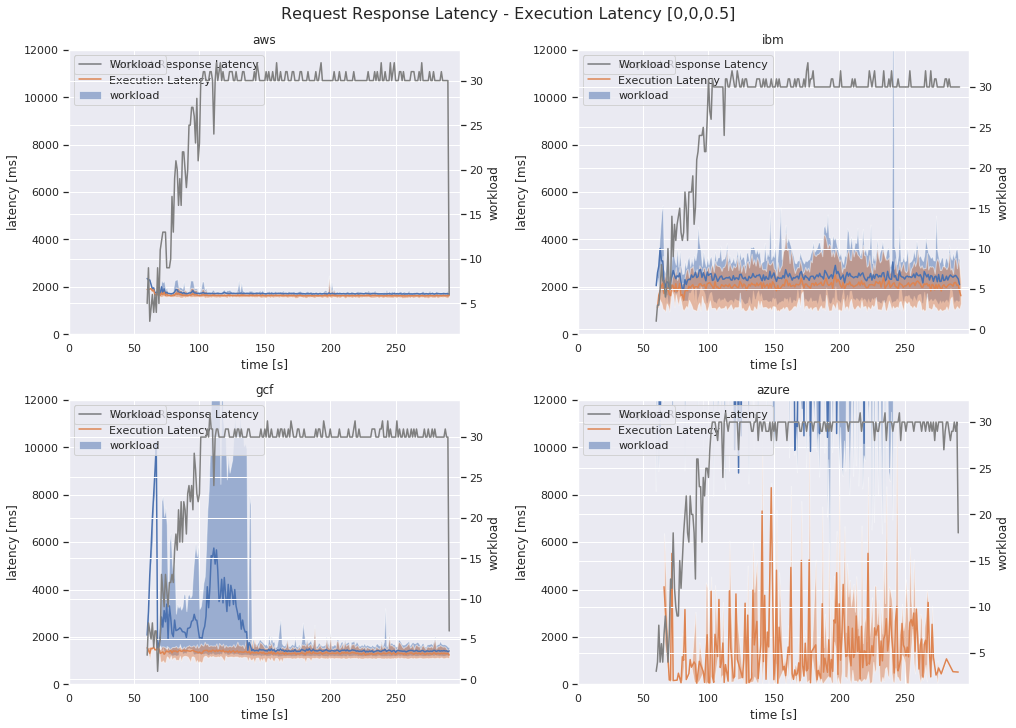

In [191]:
run = 1
workloads = all['WL'].unique()
providers = all['Provider'].unique()
from matplotlib.gridspec import GridSpec

positions = {"aws":(0,0),"gcf":(1,0),"ibm":(0,1),"azure":(1,1)}

for WL in workloads:
    fig = plt.figure(constrained_layout=True,figsize=(14,10))
    gs = GridSpec(2, 2, figure=fig)
    plt.suptitle("Request Response Latency - Execution Latency [%s]"%(WL), fontsize=16)
    idx=0
    for provider in providers:
        data = all[(all['WL'] == WL) & (all['Provider'] == provider) & (all['run'] == run)]
        data = data.copy()
        pos = positions[provider]
        ax = fig.add_subplot(gs[pos[0], pos[1]])
        plotLatencyBand(ax,data,'RStart','RLat',"Request Response Latency")
        plotLatencyBand(ax,data,'EStart','ELat',"Exectution Latency")
        ax2 = ax.twinx()
        plotWorkload(ax2,data,'RStart')
        
        ax.set_xlabel("time [s]")
        ax.set_ylabel("latency [ms]")
        ax.set_title(provider)
        ax.legend(["Request Response Latency", "Execution Latency","workload"], loc='upper left')
        ax.set_xlim([0,299])
        ax.set_ylim([0,12000])
        idx+=1

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95])
